In [73]:
#Use Gmm

In [74]:
!pip install h5py

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [75]:
!pip install scikit-network


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [76]:
!pip install pickle-mixin
!pip install plotly

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [108]:
import h5py
import numpy as np
import pickle
import plotly.graph_objects as go
import random
import pandas as pd


In [78]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sknetwork.clustering import Louvain
#to create Adjacency matrix for  Louvain clustering
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

In [109]:
#paths of all the data files
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'



In [110]:
#reading all the datafiles
pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')

In [111]:
#printing attributes of dataset
def print_attrs(name, obj):
    print(f"\n{name}")
    for attr_name, attr_value in obj.attrs.items():
        print(f"  Attribute - {attr_name}: {attr_value}")

pge_content.visititems(print_attrs)


file_name

pca_feature

umap_feature


In [112]:
pge_content['pca_feature']

<HDF5 dataset "pca_feature": shape (5000, 100), type "<f4">

In [113]:
pge_content['file_name']

<HDF5 dataset "file_name": shape (5000,), type "|O">

In [114]:
pge_content['pca_feature'][...]

array([[-3.0926747e+00,  1.1020627e+00, -7.4318394e-02, ...,
         1.9986156e-02,  8.4324218e-02, -4.1100543e-02],
       [-3.4460149e+00,  1.7983061e+00, -9.0485513e-01, ...,
        -1.0090529e-01, -1.6424106e-02, -2.8848931e-02],
       [-3.7669258e+00,  2.7572019e+00, -2.0083770e-01, ...,
         1.8441271e-02,  8.5952744e-02, -3.0304456e-02],
       ...,
       [ 4.2488699e+00,  5.1506352e+00, -2.7983534e-01, ...,
        -6.5788500e-02,  8.6044157e-03, -6.1421674e-02],
       [ 1.6042002e+00, -1.6147038e+00,  1.5758495e+00, ...,
        -6.0373917e-02, -5.2043803e-02, -8.2069546e-02],
       [ 2.6385751e+00, -9.8035985e-01, -1.0775021e+00, ...,
        -8.8430906e-04, -3.1492118e-02, -4.3888927e-02]], dtype=float32)

In [115]:
pge_content['file_name'][...]

array(['coad_nct_images/NCT-CRC-HE-100K/ADI/ADI-AAGQKKEG.tif',
       'coad_nct_images/NCT-CRC-HE-100K/ADI/ADI-AAVHMEVH.tif',
       'coad_nct_images/NCT-CRC-HE-100K/ADI/ADI-AAVISFAG.tif', ...,
       'coad_nct_images/NCT-CRC-HE-100K/TUM/TUM-YWVCKIIG.tif',
       'coad_nct_images/NCT-CRC-HE-100K/TUM/TUM-YYGPFNTH.tif',
       'coad_nct_images/NCT-CRC-HE-100K/TUM/TUM-YYRCFCFC.tif'],
      dtype=object)

In [116]:
#PCA feature reduction
#slicing pca array using ellipsis

pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

In [117]:
vgg16_pca_feature


array([[ -90.864815 ,  107.03243  ,  116.16385  , ...,    8.259951 ,
          -1.1383446,   -9.175951 ],
       [ -74.06226  ,  117.31615  ,   95.24547  , ...,   -1.9739974,
           6.8172655,    4.2547903],
       [ -81.875336 ,  122.84872  ,   83.767784 , ...,   -1.3287221,
          13.65623  ,  -11.109545 ],
       ...,
       [  32.70835  ,   31.183935 ,  -47.30978  , ...,    4.2004256,
           3.599823 ,    6.0058775],
       [ -39.911785 , -105.81029  ,  122.37118  , ...,  -14.908715 ,
          -1.1814455,  -10.837135 ],
       [  32.35425  ,  -50.3373   ,   66.50197  , ...,   -3.859397 ,
          -1.047523 ,    2.3827858]], dtype=float32)

In [118]:
#UMAP feature 
#slicing umap array using ellipsis
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [119]:
vgg16_umap_feature

array([[2.8371696, 9.671647 , 1.7483774, ..., 6.9352465, 3.2586782,
        5.000538 ],
       [2.7618659, 9.815611 , 1.5188676, ..., 6.938818 , 3.2662938,
        4.993065 ],
       [2.7637074, 9.743539 , 1.6079258, ..., 6.934657 , 3.2590747,
        5.000638 ],
       ...,
       [8.816553 , 3.5793009, 8.279579 , ..., 6.9905086, 3.2961462,
        4.975427 ],
       [9.465635 , 4.5107503, 9.333753 , ..., 6.892492 , 3.2013223,
        4.9684014],
       [9.303657 , 4.0780463, 8.855316 , ..., 6.934647 , 3.2406738,
        4.966186 ]], dtype=float32)

In [120]:
#tissue type as available ground-truth: labels
filename  = np.squeeze(pge_content['file_name'])
filename = np.array([str(x) for x in filename])
labels = np.array([x.split('/')[2] for x in filename])
print(labels,len(labels))

['ADI' 'ADI' 'ADI' ... 'TUM' 'TUM' 'TUM'] 5000


In [123]:

print(f"Labels shape: {labels.shape}")

Labels shape: (5000,)


In [91]:
#taking random 200 samples for clustering

random.seed(0)
selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 200)

In [92]:
print(len(selected_index),selected_index)

200 [3155, 3445, 331, 2121, 4188, 3980, 3317, 2484, 3904, 2933, 4779, 1789, 4134, 1140, 2308, 1144, 776, 2052, 4362, 4930, 1203, 2540, 809, 604, 2704, 3867, 4585, 824, 2898, 3556, 2590, 1675, 4526, 3907, 3626, 4270, 2133, 510, 4494, 115, 764, 3267, 9, 4043, 2729, 1998, 2664, 515, 1565, 4649, 1816, 1954, 1167, 4448, 3669, 747, 659, 2621, 4161, 4008, 893, 2469, 4515, 2384, 1022, 4484, 2725, 4426, 1664, 4941, 4482, 4813, 2356, 3645, 750, 4884, 3153, 2597, 4715, 1983, 2378, 1506, 1551, 1529, 270, 2130, 3903, 565, 735, 1066, 1225, 316, 657, 4428, 3205, 4297, 2257, 4274, 1929, 1762, 4831, 3435, 4748, 2254, 3691, 4035, 2927, 674, 2656, 944, 3984, 4809, 2746, 1559, 1990, 132, 2220, 959, 1806, 3047, 1396, 2724, 3490, 509, 1198, 1792, 370, 4701, 4376, 4932, 606, 218, 1019, 1544, 4967, 4718, 980, 3204, 749, 3032, 950, 298, 4960, 177, 1594, 1515, 1014, 3925, 1725, 500, 186, 4458, 3486, 831, 2129, 573, 1809, 589, 2466, 2869, 3572, 1477, 4125, 3826, 322, 4886, 826, 1633, 2131, 2937, 3852, 4667, 1387

In [93]:
test_data = pge_pca_feature[selected_index]
test_label = labels[selected_index]

In [94]:
print(len(pge_pca_feature))

5000


In [95]:
#Creatin g dictionary of all the datasets
datasets = {
    'pge_pca': pge_pca_feature,
    'resnet50_pca': resnet50_pca_feature,
    'inceptionv3_pca': inceptionv3_pca_feature,
    'vgg16_pca': vgg16_pca_feature,
    'pge_umap': pge_umap_feature,
    'resnet50_umap': resnet50_umap_feature,
    'inceptionv3_umap': inceptionv3_umap_feature,
    'vgg16_umap': vgg16_umap_feature
}

In [96]:
# labels ( common across all datasets)
random.seed(0)
selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 200)#200 points
test_label = labels[selected_index]

results = {}


In [97]:
#Plotting datasets
for name, feature_set in datasets.items():
    test_data = feature_set[selected_index]
    # 3D visualisation
    traces = []
    for tissue_type in np.unique(labels):
        trace = go.Scatter3d(
            x=test_data[test_label == tissue_type, 0],
            y=test_data[test_label == tissue_type, 1],
            z=test_data[test_label == tissue_type, 2],
            mode='markers',
            name=tissue_type,
            marker=dict(size=4, opacity=0.8)
        )
        traces.append(trace)

    fig = go.Figure(data=traces)
    fig.update_layout(
        title=f"First 3 principal components of {name}'s feature set",
        scene=dict(
            xaxis_title='PC1 axis',
            yaxis_title='PC2 axis',
            zaxis_title='PC3 axis'
        )
    )
    fig.show()

In [98]:
#looping through values of k for knn
for name, feature_set in datasets.items():
    for k in range(2, 15):
        kmeans_model_scores = KMeans(n_clusters=k,init='random', max_iter=500, random_state=0)
        kmeans_assignment_scores = kmeans_model_scores.fit_predict(test_data)
        print(f"K={k},{name}, Silhouette Score={silhouette_score(test_data, kmeans_assignment_scores)}")
        print(f"K={k},{name}, V Score={v_measure_score(test_label, kmeans_assignment_scores)}")

K=2,pge_pca, Silhouette Score=0.565763533115387
K=2,pge_pca, V Score=0.4006489881068127
K=3,pge_pca, Silhouette Score=0.6451683640480042
K=3,pge_pca, V Score=0.4949158273395355
K=4,pge_pca, Silhouette Score=0.6799402832984924
K=4,pge_pca, V Score=0.6098980544009545
K=5,pge_pca, Silhouette Score=0.5701753497123718
K=5,pge_pca, V Score=0.7227362356351869
K=6,pge_pca, Silhouette Score=0.5678086280822754
K=6,pge_pca, V Score=0.7169934694371072
K=7,pge_pca, Silhouette Score=0.589539110660553
K=7,pge_pca, V Score=0.7024848967926298
K=8,pge_pca, Silhouette Score=0.5631580948829651
K=8,pge_pca, V Score=0.7313905900989754
K=9,pge_pca, Silhouette Score=0.5193361043930054
K=9,pge_pca, V Score=0.7313118043500646
K=10,pge_pca, Silhouette Score=0.5261255502700806
K=10,pge_pca, V Score=0.7203697992276318
K=11,pge_pca, Silhouette Score=0.4538740813732147
K=11,pge_pca, V Score=0.736903208131828
K=12,pge_pca, Silhouette Score=0.4446151852607727
K=12,pge_pca, V Score=0.717172759183971
K=13,pge_pca, Silho

In [99]:
from scipy.sparse import csr_matrix
#looping through values of resolution for louvain
for name, feature_set in datasets.items():
    for r in np.arange(0.1,1.5,0.1):
        adjacency_matrix_scores = csr_matrix(MinMaxScaler().fit_transform(-pairwise_distances(test_data)))
        louvain_model_scores = Louvain(resolution=r, modularity='Newman', random_state=0)
        louvain_assignment_scores = louvain_model_scores.fit_transform(adjacency_matrix_scores)
        print(f"resolution={r},{name}, Silhouette Score={silhouette_score(test_data, kmeans_assignment_scores)}")
        print(f"resolution={r},{name}, V Score={v_measure_score(test_label, louvain_assignment_scores)}")
       


resolution=0.1,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.1,pge_pca, V Score=-1.5469279330398795e-16
resolution=0.2,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.2,pge_pca, V Score=-1.5469279330398795e-16
resolution=0.30000000000000004,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.30000000000000004,pge_pca, V Score=-1.5469279330398795e-16
resolution=0.4,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.4,pge_pca, V Score=-1.5469279330398795e-16
resolution=0.5,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.5,pge_pca, V Score=-1.5469279330398795e-16
resolution=0.6,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.6,pge_pca, V Score=-1.5469279330398795e-16
resolution=0.7000000000000001,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.7000000000000001,pge_pca, V Score=0.4006489881068127
resolution=0.8,pge_pca, Silhouette Score=0.45928534865379333
resolution=0.8,pge_pca, V Score=0.4006489881068127
resolution=0

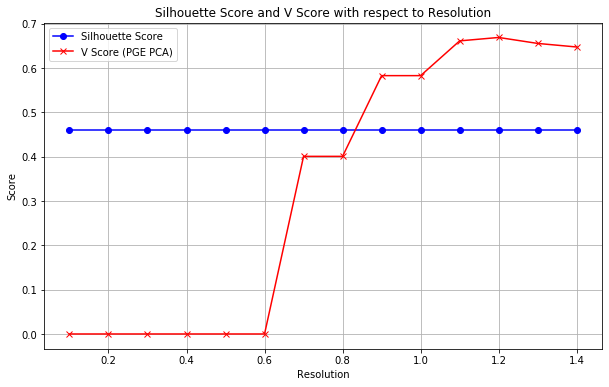

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Define the resolution values
resolutions = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4])

# Silhouette Score values (assuming these are the same for all datasets, replace as necessary)
silhouette_scores = np.array([0.45928534865379333]*len(resolutions))

# V Score values for different datasets (replace with actual data as needed)
v_scores_pge_pca = np.array([-1.5469279330398795e-16, -1.5469279330398795e-16, -1.5469279330398795e-16, 
                             -1.5469279330398795e-16, -1.5469279330398795e-16, -1.5469279330398795e-16, 
                             0.4006489881068127, 0.4006489881068127, 0.5827041599181643, 
                             0.5827041599181643, 0.6611123354541427, 0.66880701600411, 
                             0.6553538751489485, 0.6473127389516854])

# Plotting both Silhouette Score and V Score on the same graph
plt.figure(figsize=(10, 6))

# Plot Silhouette Score
plt.plot(resolutions, silhouette_scores, label="Silhouette Score", color='b', marker='o')

# Plot V Score for the pge_pca dataset
plt.plot(resolutions, v_scores_pge_pca, label="V Score (PGE PCA)", color='r', marker='x')

# Customize the graph
plt.title('Silhouette Score and V Score with respect to Resolution')
plt.xlabel('Resolution')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [101]:
for name, feature_set in datasets.items():
    #clustering algorithms
    kmeans_model = KMeans(n_clusters=3,init='random', max_iter=500, random_state=0)
    kmeans_assignment = kmeans_model.fit_predict(test_data)
    
    adjacency_matrix = csr_matrix(MinMaxScaler().fit_transform(-pairwise_distances(test_data)))
    louvain_model = Louvain(resolution=0.9, modularity='Newman', random_state=0)
    louvain_assignment = louvain_model.fit_transform(adjacency_matrix)

In [102]:
for name, feature_set in datasets.items():
    #silhouette and V-measure scores
    kmeans_silhouette = silhouette_score(test_data, kmeans_assignment)
    louvain_silhouette = silhouette_score(test_data, louvain_assignment)
    kmeans_v_measure = v_measure_score(test_label, kmeans_assignment)
    louvain_v_measure = v_measure_score(test_label, louvain_assignment)
    print(kmeans_silhouette)
    
    # Storing results
    results[name] = {
        'KMeans': {
            'Silhouette': kmeans_silhouette,
            'V-measure': kmeans_v_measure
        },
        'Louvain': {
            'Silhouette': louvain_silhouette,
            'V-measure': louvain_v_measure
        }
    }

0.64516836
0.64516836
0.64516836
0.64516836
0.64516836
0.64516836
0.64516836
0.64516836


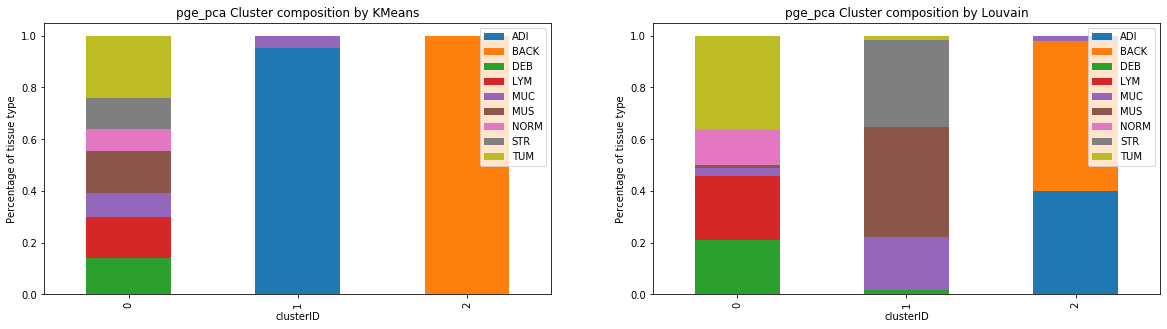

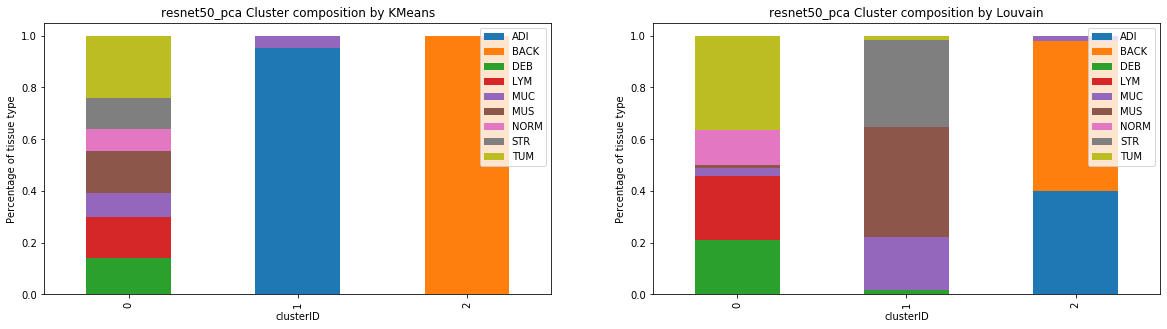

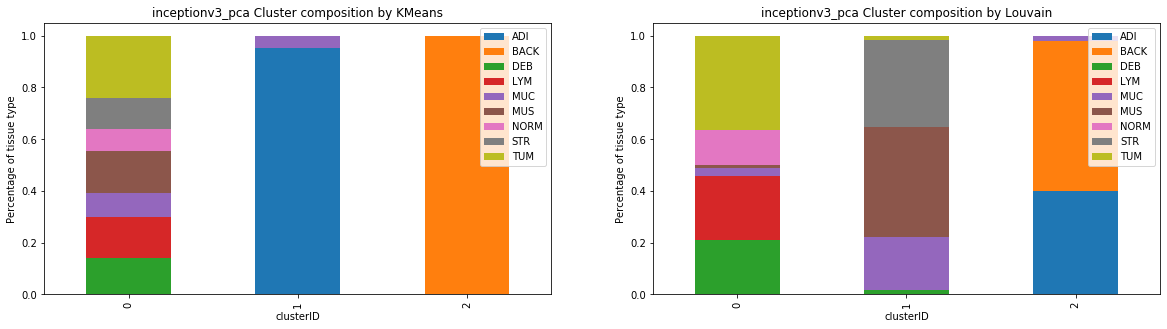

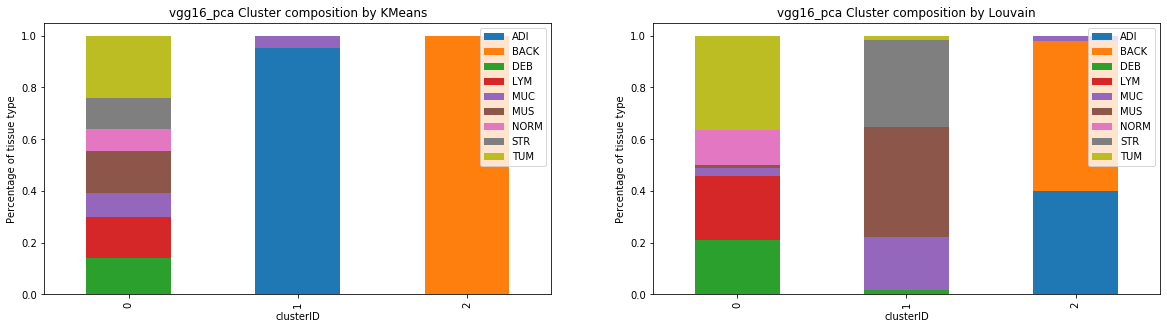

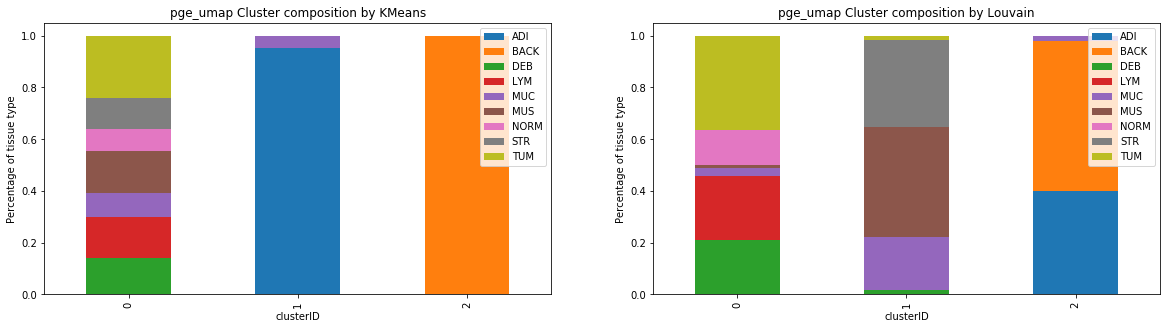

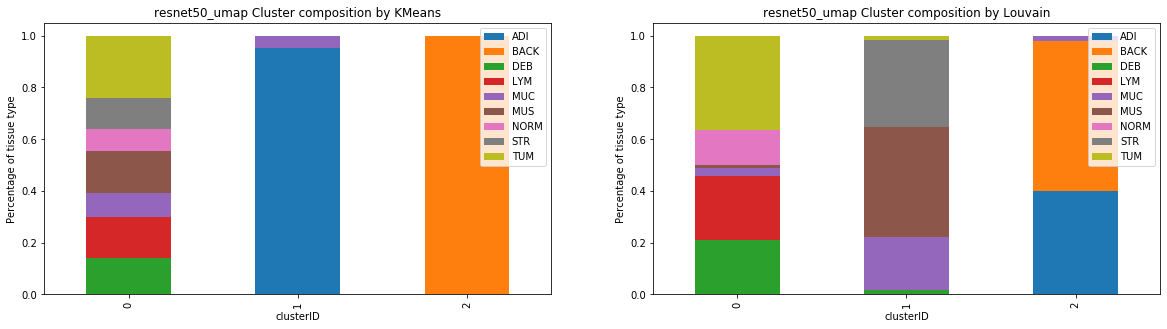

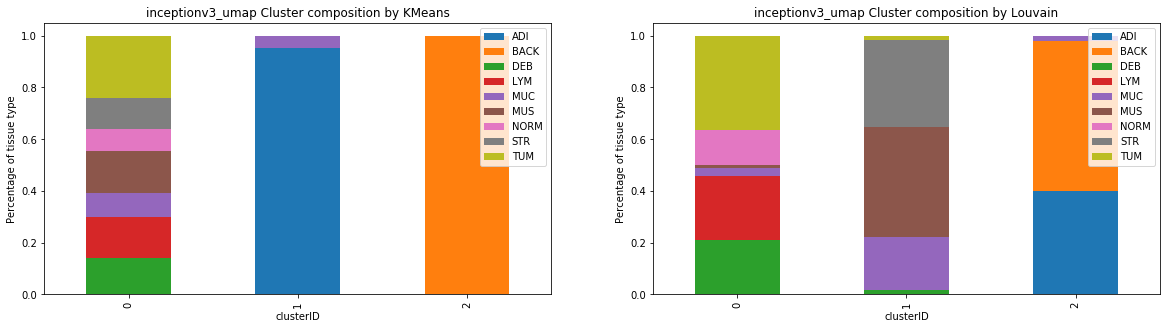

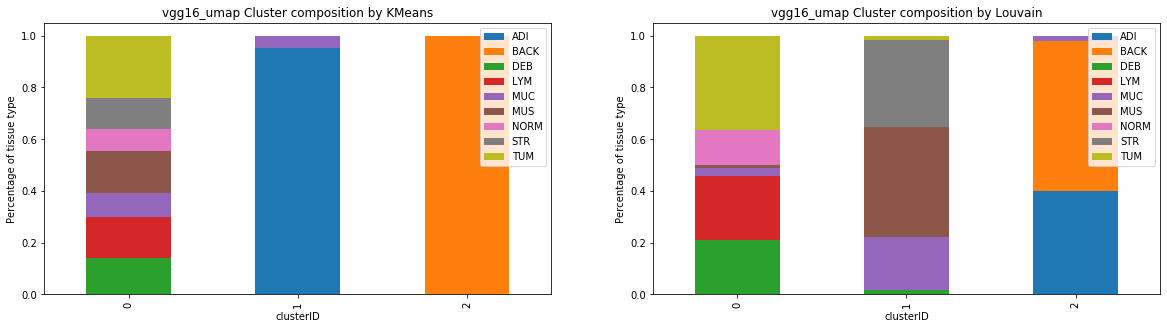

In [103]:
for name, feature_set in datasets.items():
    # Plotting clustering composition
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    
    for i, (method, assignment) in enumerate([('KMeans', kmeans_assignment), ('Louvain', louvain_assignment)]):
        cluster_df = pd.DataFrame({'clusterID': assignment, 'type': test_label})
        label_proportion_df = cluster_df.groupby(['clusterID']).apply(
            lambda x: x['type'].value_counts(normalize=True)
        ).unstack(fill_value=0)
        
        label_proportion_df.plot.bar(stacked=True, ax=axes[i])
        axes[i].set_title(f'{name} Cluster composition by {method}')
        axes[i].set_ylabel('Percentage of tissue type')
    
    plt.show()


In [104]:
#summary of results
result_df = pd.DataFrame.from_dict({
    dataset: {method: metrics for method, metrics in results.items()}
    for dataset, results in results.items()
}, orient='index')
print(result_df)


                                                             KMeans  \
pge_pca           {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
resnet50_pca      {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
inceptionv3_pca   {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
vgg16_pca         {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
pge_umap          {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
resnet50_umap     {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
inceptionv3_umap  {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
vgg16_umap        {'Silhouette': 0.64516836, 'V-measure': 0.4949...   

                                                            Louvain  
pge_pca           {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
resnet50_pca      {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
inceptionv3_pca   {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
vgg16_pca         {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
pge_umap  

In [105]:
for name, feature_set in datasets.items():
    #clustering algorithms
    kmeans_model = KMeans(n_clusters=3,init='random', max_iter=500, random_state=0)
    kmeans_assignment = kmeans_model.fit_predict(test_data)
    kmeans_silhouette = silhouette_score(test_data, kmeans_assignment)
    kmeans_v_measure = v_measure_score(test_label, kmeans_assignment)
    
    
    adjacency_matrix = csr_matrix(MinMaxScaler().fit_transform(-pairwise_distances(test_data)))
    louvain_model = Louvain(resolution=0.9, modularity='Newman', random_state=0)
    louvain_assignment = louvain_model.fit_transform(adjacency_matrix)
    louvain_silhouette = silhouette_score(test_data, louvain_assignment)
    louvain_v_measure = v_measure_score(test_label, louvain_assignment)
    results[name] = {
        'KMeans': {
            'Silhouette': kmeans_silhouette,
            'V-measure': kmeans_v_measure
        },
        'Louvain': {
            'Silhouette': louvain_silhouette,
            'V-measure': louvain_v_measure
        }
    }

In [106]:
#summary of results
result_df = pd.DataFrame.from_dict({
    dataset: {method: metrics for method, metrics in results.items()}
    for dataset, results in results.items()
}, orient='index')
print(result_df)

                                                             KMeans  \
pge_pca           {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
resnet50_pca      {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
inceptionv3_pca   {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
vgg16_pca         {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
pge_umap          {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
resnet50_umap     {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
inceptionv3_umap  {'Silhouette': 0.64516836, 'V-measure': 0.4949...   
vgg16_umap        {'Silhouette': 0.64516836, 'V-measure': 0.4949...   

                                                            Louvain  
pge_pca           {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
resnet50_pca      {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
inceptionv3_pca   {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
vgg16_pca         {'Silhouette': 0.34560424, 'V-measure': 0.5827...  
pge_umap  